In [1]:
import numpy as np
import pandas as pd
import os

import datetime as dt
import dateutil as du

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
start = dt.datetime(2013,4,28)
end = dt.datetime(2018,10,3)

In [3]:
df = pd.read_csv('opsd_germany_daily.txt',parse_dates=['Date'],index_col='Date')
df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


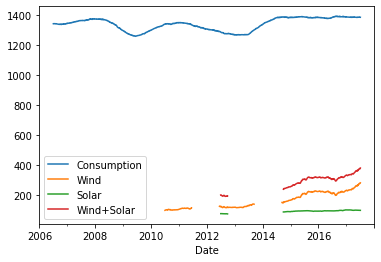

In [ ]:
data_365d_rol = df.rolling(window=365,center=True).mean()
data_365d_rol.plot()

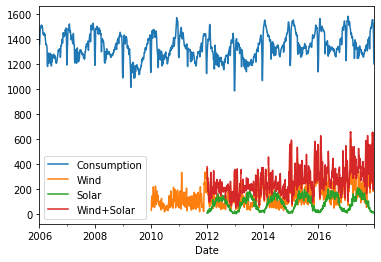

In [ ]:
data_7d_rol = df.rolling(window=7,center=True).mean()
data_7d_rol.plot()

Text(0.5, 1.0, 'Trends')

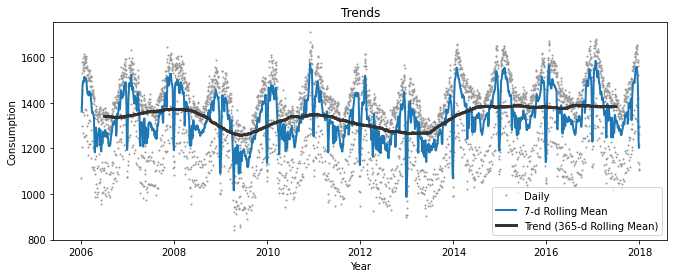

In [ ]:
fig, ax = plt.subplots(figsize=(11,4))
ax.plot(df['Consumption'],marker='.',markersize=2,color='0.6',linestyle='None',label='Daily')
ax.plot(data_7d_rol['Consumption'], linewidth=2,label='7-d Rolling Mean')
ax.plot(data_365d_rol['Consumption'],color='0.2',linewidth=3,label='Trend (365-d Rolling Mean)')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption')
ax.set_title('Trends')

In [ ]:
df=df.dropna()
df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2012-01-01,948.128,227.465,6.587,234.052
2012-01-02,1269.581,207.327,6.574,213.901
2012-01-03,1334.745,473.468,24.679,498.147
2012-01-04,1347.136,499.804,14.681,514.485
2012-01-05,1376.658,523.851,5.071,528.922


In [ ]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday'] = df.index.weekday
df['Quarter'] = df.index.quarter
df.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday,Quarter
Date,,,,,,,,
2012-01-01,948.128,227.465,6.587,234.052,2012,1,6,1
2012-01-02,1269.581,207.327,6.574,213.901,2012,1,0,1
2012-01-03,1334.745,473.468,24.679,498.147,2012,1,1,1
2012-01-04,1347.136,499.804,14.681,514.485,2012,1,2,1
2012-01-05,1376.658,523.851,5.071,528.922,2012,1,3,1


In [ ]:
df_lags=df

In [ ]:
for i in range(1,5):
  df_lags['lags_{}'.format(i)]=df_lags.Consumption.shift(i)

In [ ]:
df_lags.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday,Quarter,lags_1,lags_2,lags_3,lags_4
Date,,,,,,,,,,,,
2012-01-09,1443.371,151.837,5.264,157.101,2012,1,0,1,NaN,NaN,NaN,NaN
2012-01-10,1434.631,175.995,17.827,193.822,2012,1,1,1,1443.371,NaN,NaN,NaN
2012-01-11,1449.768,197.434,10.849,208.283,2012,1,2,1,1434.631,1443.371,NaN,NaN
2012-01-12,1442.448,446.327,18.023,464.350,2012,1,3,1,1449.768,1434.631,1443.371,NaN
2012-01-13,1403.402,415.106,18.778,433.884,2012,1,4,1,1442.448,1449.768,1434.631,1443.371


In [ ]:
df_lags=df_lags.dropna(inplace=True)
df_lags

In [ ]:
drop_cols=df_lags.columns[0:4]
drop_cols

Index(['Consumption', 'Wind', 'Solar', 'Wind+Solar'], dtype='object')

In [ ]:
X=df_lags.drop(drop_cols,axis=1)
X.head()

,Year,Month,Weekday,Quarter,lags_1,lags_2,lags_3,lags_4
Date,,,,,,,,
2012-01-09,2012,1,0,1,NaN,NaN,NaN,NaN
2012-01-10,2012,1,1,1,1443.371,NaN,NaN,NaN
2012-01-11,2012,1,2,1,1434.631,1443.371,NaN,NaN
2012-01-12,2012,1,3,1,1449.768,1434.631,1443.371,NaN
2012-01-13,2012,1,4,1,1442.448,1449.768,1434.631,1443.371


In [ ]:
def TimeSeriesTrainTestSplit(x,y,test_size):
  test_index = int(len(x)*(1-test_size))

  X_train = x.iloc[:test_index]
  y_train = y.iloc[:test_index]
  X_test = x.iloc[test_index:]
  y_test = y.iloc[test_index:]
  return X_train,y_train,X_test,y_test

In [ ]:
X_train,y_train,X_test,y_test = TimeSeriesTrainTestSplit(X,Y,0.2)

NameError: ignored

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test,y_pred)
mse

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

In [ ]:
r2=r2_score(y_test,y_pred)
r2

In [ ]:
mae=mean_absolute_error(y_test,y_pred)
mae

In [ ]:
print('r2:',round(r2,4))
print('mae:',round(mae,4))
print('mse:',round(mse,4))
print('rmse:',round(rmse,4))

In [ ]:
y_test= y_test.reset_index(drop=True)
y_test

In [ ]:
y_pred[:10]

In [ ]:
y_pred1=pd.Series(y_pred)
y_pred1

In [ ]:
y_pred1.plor()

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(y_test[:100],marker='.',linewidth=4,markersize=3,label='Real')
ax.plot(y_pred[:100],linewidth=2,markersize=3,color='red',label='Predicrion')

In [4]:
from statsmodels.tsa.ar_model import AR

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
Xar = df_lags.Consumption
Xar = Xar.reset_index(drop=True)
Xar

0       1443.37100
1       1434.63100
2       1449.76800
3       1442.44800
4       1403.40200
           ...    
2174    1263.94091
2175    1299.86398
2176    1295.08753
2177    1215.44897
2178    1107.11488
Name: Consumption, Length: 2179, dtype: float64

In [ ]:
Yar = Y
Yar.head()

In [ ]:
X_trainAR,y_trainAR,X_testAR,y_testAR = TimeSeriesTrainTestSplit(Xar,Yar,0.2)
print(shape)

In [ ]:
model_AR=AR(X_trainAR)
model_AR_fit=model_AR.fit()

In [ ]:
predAR=model_AR_fit.predict(X_trainAR.size,X_trainAR.size+X_testAR.size-1)

In [6]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model_arima1 = ARIMA(X_trainAR, order=(7,2,3))
model_arima1_fit1=model_arima1.fit()

In [ ]:
predictionsARIMA1=model_arima1_fit1.forecast(X_testAR.size)[0]

In [ ]:
predictionsARIMA1.size

In [ ]:
predictionsARIMA1[:10]

In [ ]:
mseARIMA=mean_squared_error(y_test,predictionsARIMA1)